<a href="https://colab.research.google.com/github/AslinJoshy/MACHINE_LEARNING_PROJECTS/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval Prediction**

### **Objective**


The loan approval prediction system aims to leverage machine learning to evaluate and predict the risk associated with granting loans. By analyzing various factors such as financial history, credit score, and income, the system assesses the creditworthiness of applicants and predicts their likelihood of timely repayment. This predictive model helps lending institutions automate and expedite the loan approval process, minimizing the risk of defaults and improving overall operational efficiency. The system contributes to fair and compliant decision-making by using objective criteria, reducing the potential for bias or discrimination. It enhances customer satisfaction by providing transparent and quicker loan approval decisions. Additionally, the system assists in portfolio management, helping lenders optimize their loan portfolios by balancing risk and return. Its adaptability ensures relevance in changing economic conditions, making it a valuable tool for making informed, data-driven decisions in the lending industry. Ultimately, the objective is to enhance financial stability for lending institutions, improve access to credit for creditworthy applicants, and create a more efficient and equitable lending process.







### **Data Source**
       
A Finance company deals in all home loans. They are present in all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
 This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not.

### **Import Library**

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [72]:

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### **Import data**

In [73]:
ds = pd.read_csv("/content/Loan Prediction Dataset.csv")
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **Describe data**

In [74]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [75]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### **Data preprocessing**

In [76]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
ds['LoanAmount'] = ds['LoanAmount'].fillna(ds['LoanAmount'].mean())
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mean())
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mean())

In [78]:
ds['Gender'] = ds["Gender"].fillna(ds['Gender'].mode()[0])
ds['Married'] = ds["Married"].fillna(ds['Married'].mode()[0])
ds['Dependents'] = ds["Dependents"].fillna(ds['Dependents'].mode()[0])
ds['Self_Employed'] = ds["Self_Employed"].fillna(ds['Self_Employed'].mode()[0])
ds.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
# label encoding
ds.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [81]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [82]:
# Dependent column values
ds['Dependents'].value_counts()


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [83]:
# replace the value of 3+ to 4
ds = ds.replace(to_replace='3+', value=4)

In [84]:
# dependent values
ds['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

### **Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

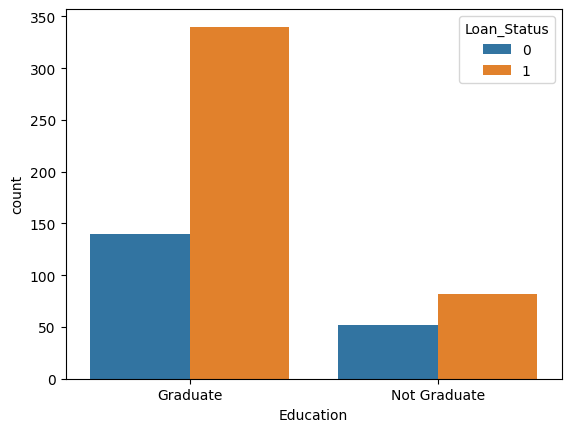

In [85]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=ds)

<Axes: xlabel='Married', ylabel='count'>

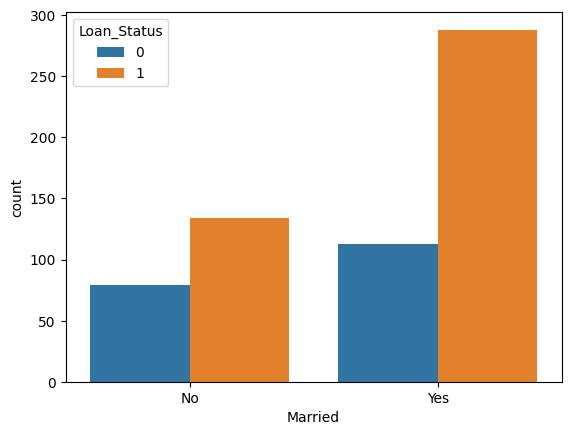

In [86]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=ds)


In [87]:
ds.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [88]:
#print the first 5 rows of the given dataset
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### **Define Target Variable(y) and Feature Variables(X)**

In [89]:
X = ds.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = ds['Loan_Status']

In [90]:
print(X)



     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [91]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


### **Train Test Split**

In [92]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [93]:
print(X.shape, x_train.shape, x_test.shape)

(614, 11) (552, 11) (62, 11)


### **Modeling**

In [94]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

### **Model Evaluation**

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy is 77.92207792207793
Cross validation is 79.96801279488204


In [96]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy is 67.53246753246754
Cross validation is 71.4980674396908


In [97]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy is 76.62337662337663
Cross validation is 78.34199653471944


In [98]:
model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy is 75.97402597402598
Cross validation is 76.0629081700653


### **Hyperparameter Tuning**

In [99]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, Y)

Accuracy is 76.62337662337663
Cross validation is 80.78368652538984


### **Prediction**

**Confusion Matrix**

In [100]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [101]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
z = confusion_matrix(y_test, y_pred)
z

array([[10,  9],
       [ 6, 37]])

<Axes: >

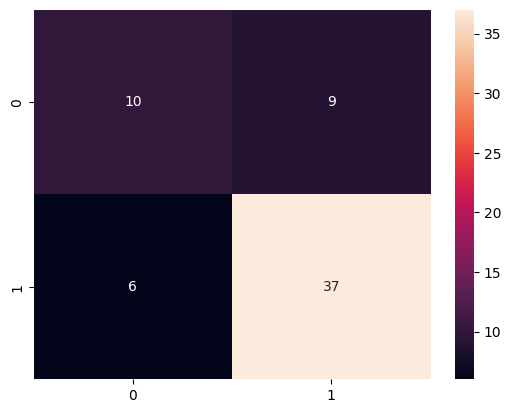

In [102]:
sns.heatmap(z, annot=True)

### **Explanation**


 A confusion matrix summary of prediction results on a classification model. It breaks down predictions into four categories: True Positive (correctly predicted positives),True Negative (correctly predicted negatives),False Positive (incorrectly predicted positives) and False Negative (incorrectly predicted negatives).These components help calculate metrics like Accuracy, Precision, Recall, and F1 Score, offering a more nuanced evaluation beyond simple accuracy. The matrix is particularly useful for assessing model behavior on imbalanced datasets. Analyzing these metrics aids in understanding a model's strengths and weaknesses, guiding adjustments for better performance.